In [1]:
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def conv(x):
    return x.replace(',','.').encode()

<function matplotlib.pyplot.show(close=None, block=None)>

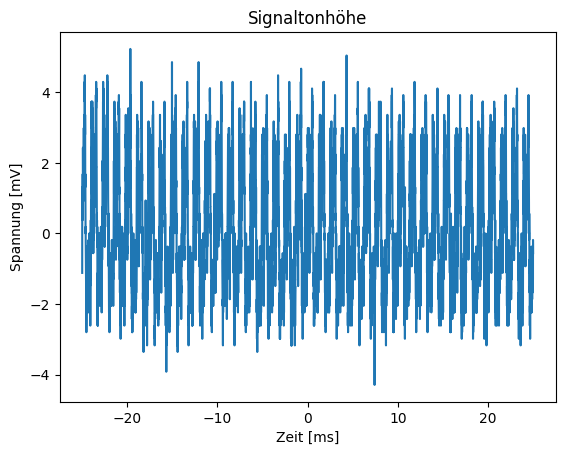

In [3]:
cutted_data = np.genfromtxt((conv(x) for x in open('MundharmonikaZ7.csv')), skip_header=3, max_rows=1000, delimiter=';')
data = np.genfromtxt((conv(x) for x in open('MundharmonikaZ7.csv')), skip_header=3, delimiter=';')

plt.show

plt.plot(data[:,0], data[:,1])

plt.xlabel('Zeit [ms]')
plt.ylabel('Spannung [mV]')
plt.title('Signaltonhöhe');

plt.show

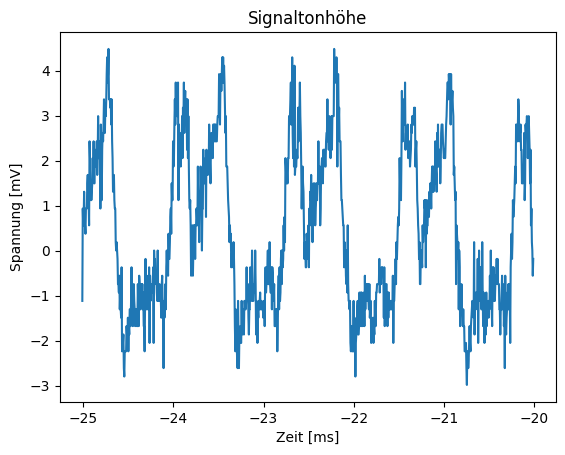

In [4]:
plt.plot(cutted_data[:,0], cutted_data[:,1])

plt.xlabel('Zeit [ms]')
plt.ylabel('Spannung [mV]')
plt.title('Signaltonhöhe');

Grundperiode: 1,2ms
Grundfrequenz: 1/1,2ms = 0,833kHz = 833Hz
Signaldauer: 50ms = 0,05s
Abtastintervall: 0,005ms
Abtastfrequenz: 1/0,005ms = 200kHz = 200000Hz
Signallänge: 0,05s*200000Hz = 10000

[1803.0592574   +0.j          334.7501547   -7.49990006j
   91.53718138 -92.56624599j ...  395.78607666+117.64859943j
   91.53718138 +92.56624599j  334.7501547   +7.49990006j]
Detla t =  0.004999999999999005


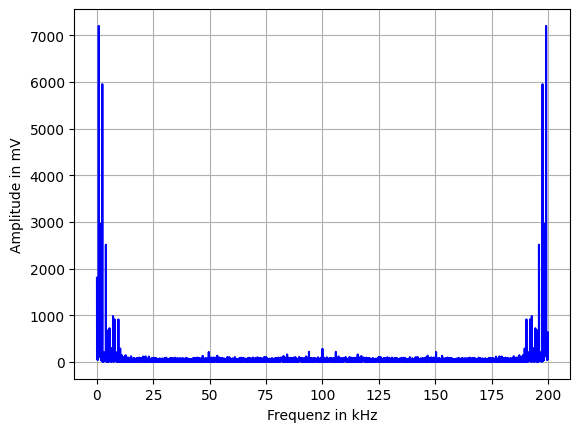

Frequenz mit groesster Amplitude : 9964 Hz - Amplitude: 7199.66 mV


In [5]:
#print(data)
fourier = np.fft.fft(data[:,1])
print(fourier)

spektrum = np.abs(fourier)
#delta_t = 0.000005
delta_t = np.abs(data[:,0][1] - data[:,0][0])
print("Detla t = ", delta_t)


freq = range(0, len(data[:,1]), 1) / (len(data[:,1]) * delta_t)

plt.plot(freq, spektrum, 'b')
plt.ylabel('Amplitude in mV')
plt.xlabel('Frequenz in kHz')
plt.grid(True)
plt.show()

find_max = np.max(spektrum)
find_index_max = np.where(spektrum == find_max)
print('Frequenz mit groesster Amplitude : ' + str(find_index_max[0][0]) + ' Hz'
      + ' - Amplitude: ' + str(round(find_max, 2)) + ' mV')

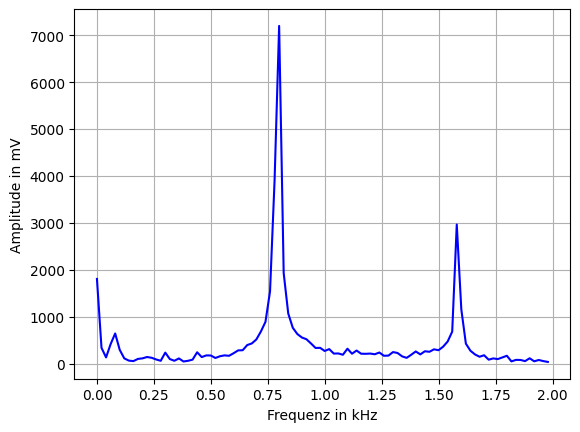

In [6]:
plt.plot(freq[:100], spektrum[:100], 'b')
plt.ylabel('Amplitude in mV')
plt.xlabel('Frequenz in kHz')
plt.grid(True)
plt.show()

In [7]:
# Grundfrequenz abgelesen = 775Hz

# 2. Frequenzgang von Lautsprechern

## Lautsprecher links
|Frequenz   |Amplitude Eingang |Amplitude Ausgang(Mikrofon)|Phasenverschiebung   |
|-----------|------------------|---------------------------|---------------------|100hz
|     1,512V |           90,56mV |                   4,472ms |             
|200hz      |1,512V            |145,8mV                    |0ms                  |
|300hz      |1,512V            |76,81mV                    |2,935ms              |
|400hz      |1,512V            |54,36mV                    |2,056ms              |
|500hz      |1,512V            |42,28mV                    |1,642ms              |
|700hz      |1,512V            |36,25mV                    |1,154ms              |
|850hz      |1,512V            |31,93mV                    |0,933ms              |
|1kHz       |1,512V            |31,93mV                    |0,800ms              |
|1,2hz      |1,512V            |31,93mV                    |0,641ms              |
|1,5khz     |1,512V            |29,34mV                    |0,492ms              |
|1,7hz      |1,512V            |30,20mV                    |0,427ms              |
|2khz       |1,512V            |31,93mV                    |0,339ms              |
|3khz       |1,512V            |21,57mV                    |0,193ms              |
|4khz       |1,512V            |39,7mV                     |0,115ms              |
|5khz       |1,512V            |22,43mV                    |0,055ms              |
|6khz       |1,512V            |24,16mV                    |0,046ms              |
|10khz      |1,495V            |23,3mV                     |0,061ms              |

## Lautsprecher rechts
|Frequenz   |Amplitude Eingang |Amplitude Ausgang(Mikrofon)|Phasenverschiebung   |
|-----------|------------------|---------------------------|---------------------|
|100hz      |1,512V            |19,84mV                    |5,736ms              |
|200hz      |1,512V            |40,56mV                    |1,857ms              |
|300hz      |1,53V             |56,09mV                    |0,9ms                |
|400hz      |1,512V            |113,1mV                    |0,48ms               |
|500hz      |1,512V            |157,1mV                    |1,883ms              |
|700hz      |1,512V            |72,49mV                    |1,169ms              |
|850hz      |1,53V             |56,92mV                    |0,922ms              |
|1kHz       |1,512V            |49,19mV                    |0,762ms              |
|1,2hz      |1,512V            |42,88mV                    |0,616ms              |
|1,5khz     |1,512V            |45,74mV                    |0,482ms              |
|1,7hz      |1,512V            |41,42mV                    |0,417ms              |
|2khz       |1,512V            |42,28mV                    |0,339ms              |
|3khz       |1,512V            |40,56mV                    |0,193ms              |
|4khz       |1,512V            |27,61mV                    |0,135ms              |
|5khz       |1,512V            |41,42mV                    |0,048ms              |
|6khz       |1,530V            |25,02mV                    |0,077ms              |
|10khz      |1,512V            |31,07mV                    |0,060ms              |    |

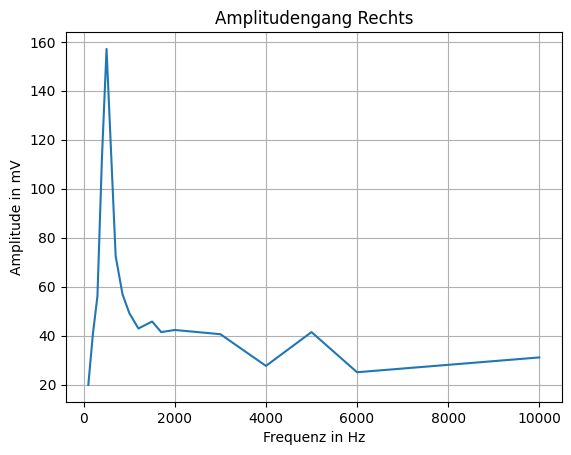

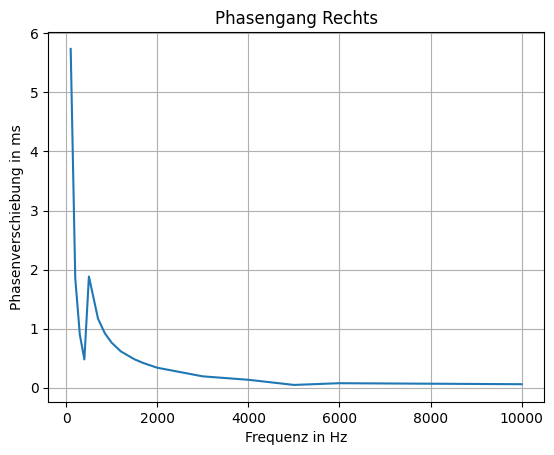

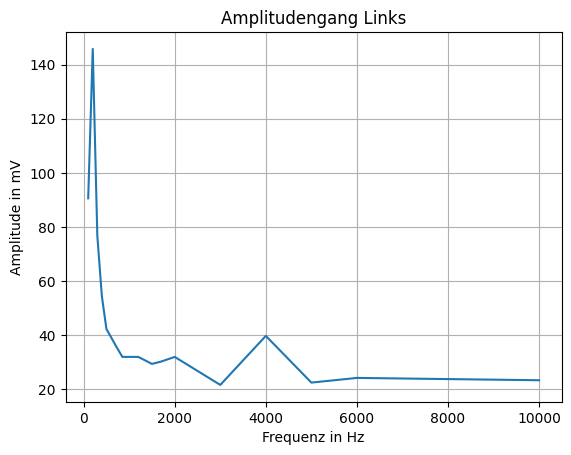

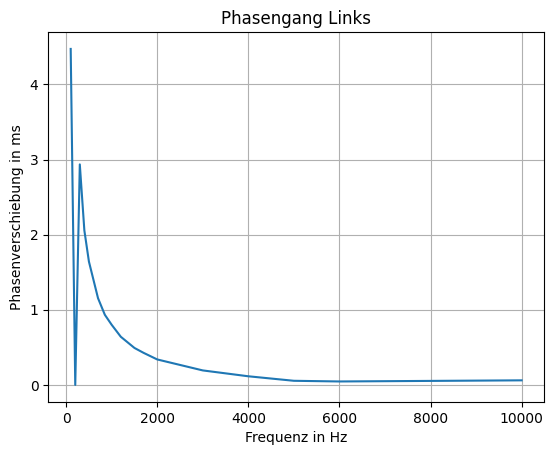

In [8]:
frequenz = [100,200,300,400,500,700,850,1000,1200,1500,1700,2000,3000,4000,5000,6000,10000]
amplitude_eingang_rechts = [1.512,1.512,1.53,1.512,1.512,1.512,1.53,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.512,1.530,1.512]         
amplitude_ausgang_rechts = [19.84,40.56,56.09,113.1,157.1,72.49,56.92,49.19,42.88,45.74,41.42,42.28,40.56,27.61,41.42,25.02,31.07]
phasenverschiebung_rechts = [5.736,1.857,0.9,0.48,1.883,1.169,0.922,0.762,0.616,0.482,0.417,0.339,0.193,0.135,0.048,0.077,0.06]
amplitude_eingang_links = [1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.512, 1.495]
amplitude_ausgang_links = [90.56, 145.8, 76.81, 54.36, 42.28, 36.25, 31.93, 31.93, 31.93, 29.34, 30.2, 31.93, 21.57, 39.7, 22.43, 24.16, 23.3]
phasenverschiebung_links = [4.472, 0, 2.935, 2.056, 1.642, 1.154, 0.933, 0.8, 0.641, 0.492, 0.427, 0.339, 0.193, 0.115, 0.055, 0.046, 0.061]

fig, p1 = plt.subplots()
p1.plot(frequenz, amplitude_ausgang_rechts)
p1.set_title('Amplitudengang Rechts');
p1.set_ylabel('Amplitude in mV')
p1.set_xlabel('Frequenz in Hz')
p1.grid(True)
plt.show()

fig, p2 = plt.subplots()
p2.plot(frequenz, phasenverschiebung_rechts)
p2.set_title('Phasengang Rechts');
p2.set_ylabel('Phasenverschiebung in ms')
p2.set_xlabel('Frequenz in Hz')
p2.grid(True)
plt.show()

fig, p1 = plt.subplots()
p1.plot(frequenz, amplitude_ausgang_links)
p1.set_title('Amplitudengang Links');
p1.set_ylabel('Amplitude in mV')
p1.set_xlabel('Frequenz in Hz')
p1.grid(True)
plt.show()

fig, p2 = plt.subplots()
p2.plot(frequenz, phasenverschiebung_links)
p2.set_title('Phasengang Links');
p2.set_ylabel('Phasenverschiebung in ms')
p2.set_xlabel('Frequenz in Hz')
p2.grid(True)
plt.show()

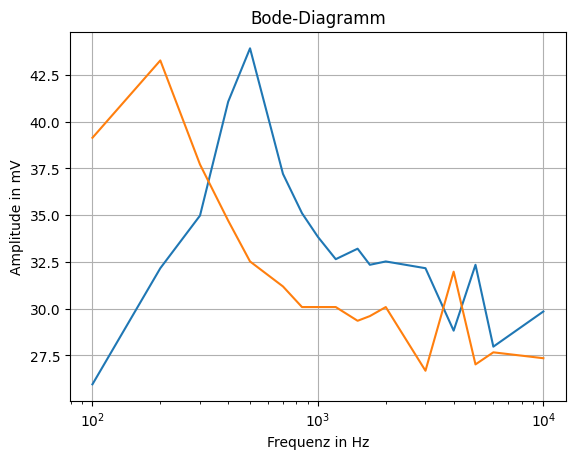

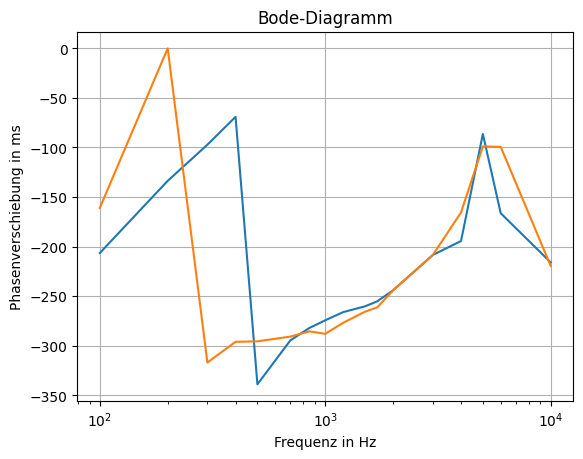

In [9]:
# Amplitude in dB
amplitude_rechts = 20 * np.log10(amplitude_ausgang_rechts)
amplitude_links = 20 * np.log10(amplitude_ausgang_links)
# Phase in degree
phase_degree_rechts = -np.array(phasenverschiebung_rechts) * np.array(frequenz) * 360 / 1000
phase_degree_links = -np.array(phasenverschiebung_links) * np.array(frequenz) * 360 / 1000

fig, p5 = plt.subplots()
p5.plot(frequenz, amplitude_rechts)
p5.plot(frequenz, amplitude_links)
p5.set_title('Bode-Diagramm');
p5.set_ylabel('Amplitude in mV')
p5.set_xlabel('Frequenz in Hz')
p5.grid(True)
p5.semilogx()
plt.show()

fig, p6 = plt.subplots()
p6.plot(frequenz, phase_degree_rechts)
p6.plot(frequenz, phase_degree_links)
p6.set_title('Bode-Diagramm');
p6.set_ylabel('Phasenverschiebung in ms')
p6.set_xlabel('Frequenz in Hz')
p6.grid(True)
p6.semilogx()
plt.show()